<a href="https://colab.research.google.com/github/fg0611/data-professionalization/blob/main/data-analysis/finance_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt


In [9]:
!pip install -q yfinance

     |████████████████████████████████| 50 kB 3.8 MB/s 
     |████████████████████████████████| 128 kB 16.5 MB/s 
     |████████████████████████████████| 4.0 MB 47.6 MB/s 
     |████████████████████████████████| 110 kB 47.1 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 112 kB 53.0 MB/s 


In [10]:
import yfinance as yf

In [11]:
warnings.filterwarnings("ignore")

In [14]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
def pre_proc(name):
  df = pd.read_csv(name, delimiter="\t", parse_dates=True).dropna()
  df = df.iloc[:, :-2]
  df.columns = ["time", "open", "high", "low", "close", "volume"]
  df.set_index("time", inplace=True)
  df = df.loc["2022.01.01":]
  return df

In [16]:
df = pre_proc("/content/drive/MyDrive/Colab Notebooks/EURUSD_D1.csv")
df.head()

,open,high,low,close,volume
time,,,,,
2022.01.03,1.13693,1.13778,1.12795,1.12971,53813
2022.01.04,1.12961,1.13226,1.12723,1.12862,62525
2022.01.05,1.12852,1.13466,1.12765,1.13135,61289
2022.01.06,1.13111,1.13316,1.12846,1.12976,67251
2022.01.07,1.12960,1.13647,1.12901,1.13590,49836


In [30]:
def pre_proc_yf(name):
  df = yf.download(name, start="2011-01-01", end=pd.to_datetime("today").strftime("%Y-%m-%d"), progress=False).dropna()
  df.columns = ["open", "high", "low", "close", "adj close","volume"]
  del df["adj close"]
  # simple moving avg 30 days
  df["sma fast"] = df['close'].rolling(30).mean()
  # simple moving avg 60 days
  df["sma slow"] = df['close'].rolling(60).mean()
  df.index.rename("time", inplace=True)
  return df

In [31]:
df_yf = pre_proc_yf("EURUSD=X")
df_yf.head()

,open,high,low,close,volume,sma fast,sma slow
time,,,,,,,
2011-01-03,1.335595,1.336505,1.325293,1.335791,0,NaN,NaN
2011-01-04,1.336005,1.343093,1.331824,1.335684,0,NaN,NaN
2011-01-05,1.332392,1.332392,1.312905,1.332108,0,NaN,NaN
2011-01-06,1.316101,1.317037,1.303373,1.315686,0,NaN,NaN
2011-01-07,1.298904,1.302134,1.293895,1.297993,0,NaN,NaN


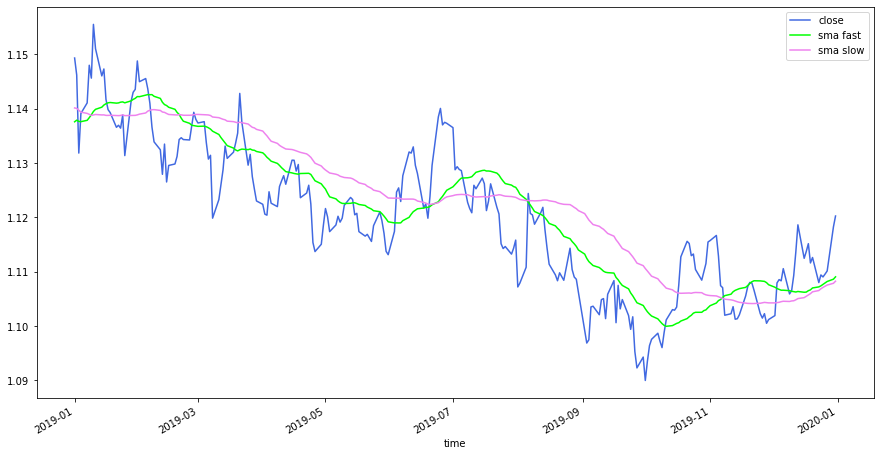

In [32]:
df_yf[["close","sma fast", "sma slow"]].loc["2019"].plot(figsize=(15,8), color=["royalblue", "lime", "violet"])

In [33]:
df_yf["position"] = np.nan
# create condition
df_yf.loc[(df_yf["sma fast"] > df_yf["sma slow"]), "position"] = 1
df_yf.loc[(df_yf["sma fast"] < df_yf["sma slow"]), "position"] = -1

In [34]:
df_yf = df_yf.loc["2019"]
df_yf.head()

,open,high,low,close,volume,sma fast,sma slow,position
time,,,,,,,,
2019-01-01,1.149425,1.155001,1.146500,1.149306,0,1.137572,1.140115,-1.0
2019-01-02,1.146132,1.149700,1.134572,1.146171,0,1.137869,1.140039,-1.0
2019-01-03,1.131734,1.140914,1.131734,1.131811,0,1.137635,1.139681,-1.0
2019-01-04,1.139095,1.141774,1.134816,1.139108,0,1.137595,1.139348,-1.0
2019-01-07,1.141292,1.147447,1.140524,1.141044,0,1.137838,1.139114,-1.0


## verif graph

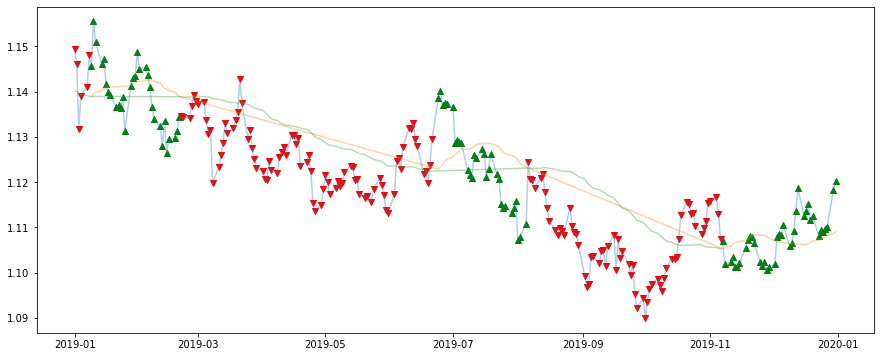

In [40]:
year="2019"

# select signals open and close
idx_open = df_yf.loc[df_yf["position"] == 1]
idx_close = df_yf.loc[df_yf["position"] == -1]

idx_open.head()

#graph size 
plt.figure(figsize=(15,6))

#plot the points of the open long signal in green and sell in red
plt.scatter(idx_open.index, idx_open["close"], color="g", marker="^")
plt.scatter(idx_close.index, idx_close["close"], color="r", marker="v")

# plot the resistance to be sure that the conditions are completed
plt.plot(df_yf.index, df_yf["close"], alpha=0.35)
plt.plot(idx_open.index, idx_open["sma fast"], alpha=0.35)
plt.plot(idx_close.index, idx_close["sma slow"], alpha=0.35)

plt.show()